# Data set analyse (v2)
> Look at the data set

- toc: true
- badges: false
- comments: true
- author: Cécile Gallioz
- categories: [sklearn, v2]

# Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
myData = pd.read_csv("../../scikit-learn-mooc/datasets/adult-census.csv")

In [3]:
myData.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
print(f"The dataset data contains {myData.shape[0]} samples and {myData.shape[1]} features")

The dataset data contains 48842 samples and 14 features


In [5]:
myData["class"].value_counts()

 <=50K    37155
 >50K     11687
Name: class, dtype: int64

In [6]:
myData.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

In [7]:
from sklearn.compose import make_column_selector as selector
#
numerical_columns = selector(dtype_include="int64")(myData)
categorical_columns = selector(dtype_include="object")(myData)
all_columns = numerical_columns + categorical_columns
myData = myData[all_columns]

In [8]:
print(f"The dataset data contains {myData.shape[0]} samples and {myData.shape[1]} features")

The dataset data contains 48842 samples and 14 features


In [9]:
data_numerical = myData[numerical_columns]
data_categorical = myData[categorical_columns]

# Visualization

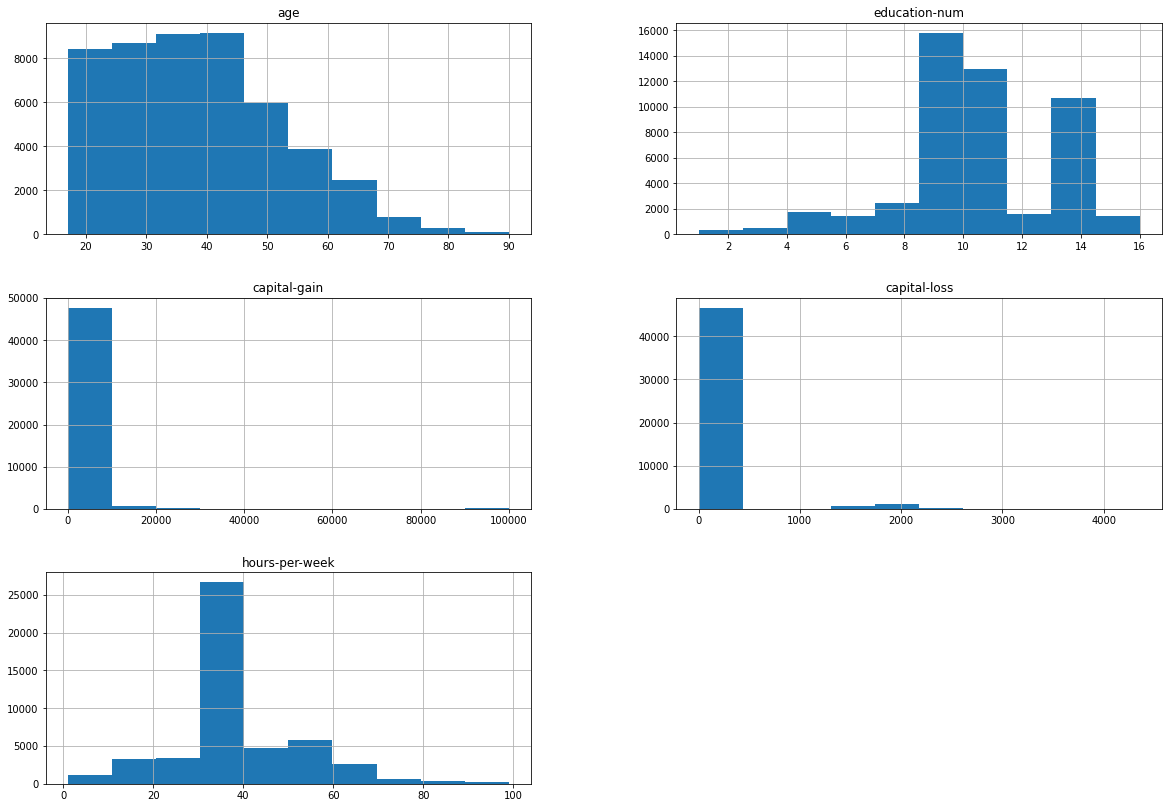

In [18]:
_ = myData.hist(figsize=(20, 14))

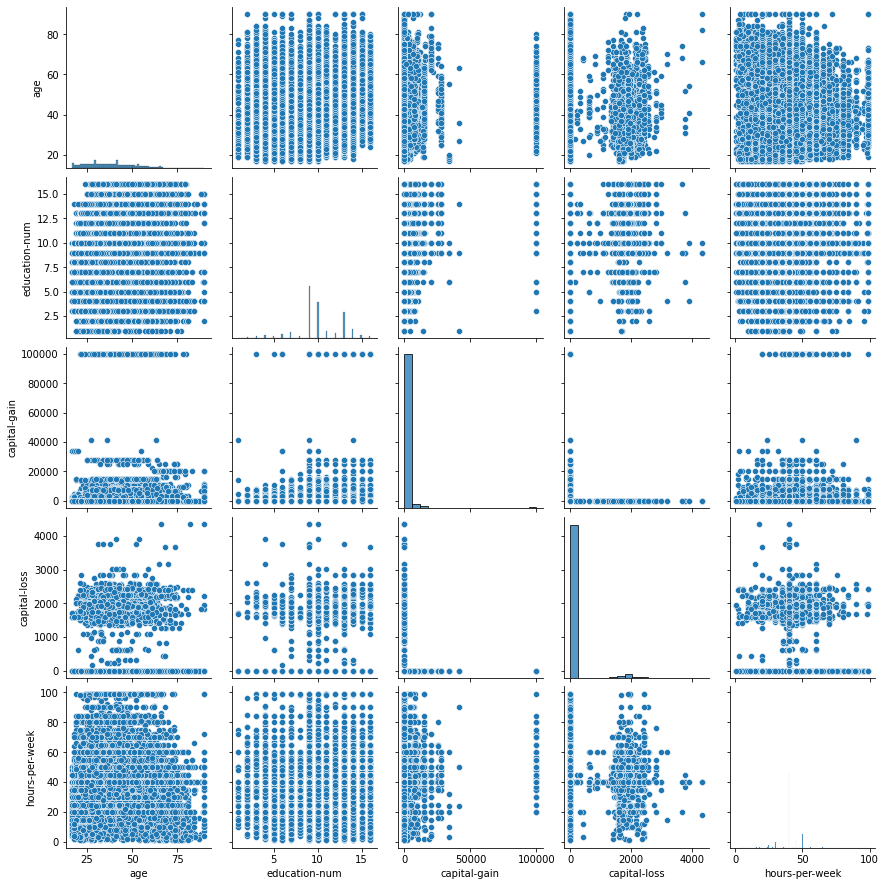

In [16]:
_ = sns.pairplot(myData)

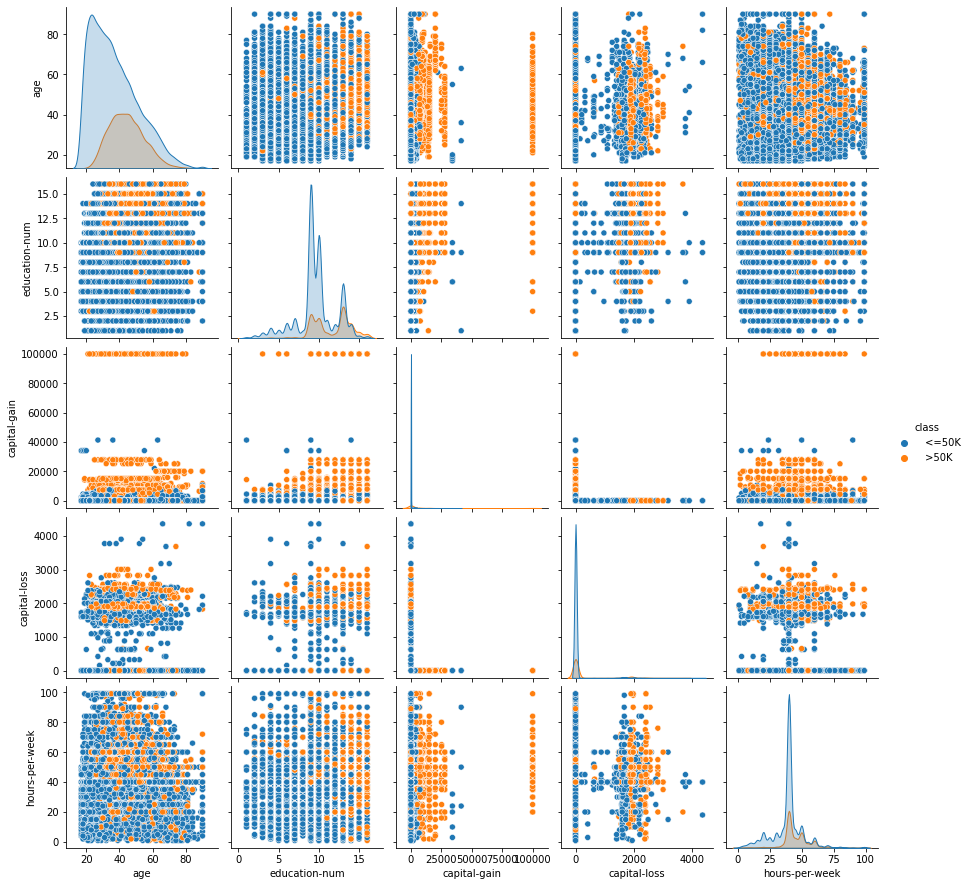

In [14]:
_ = sns.pairplot(myData, hue="class")

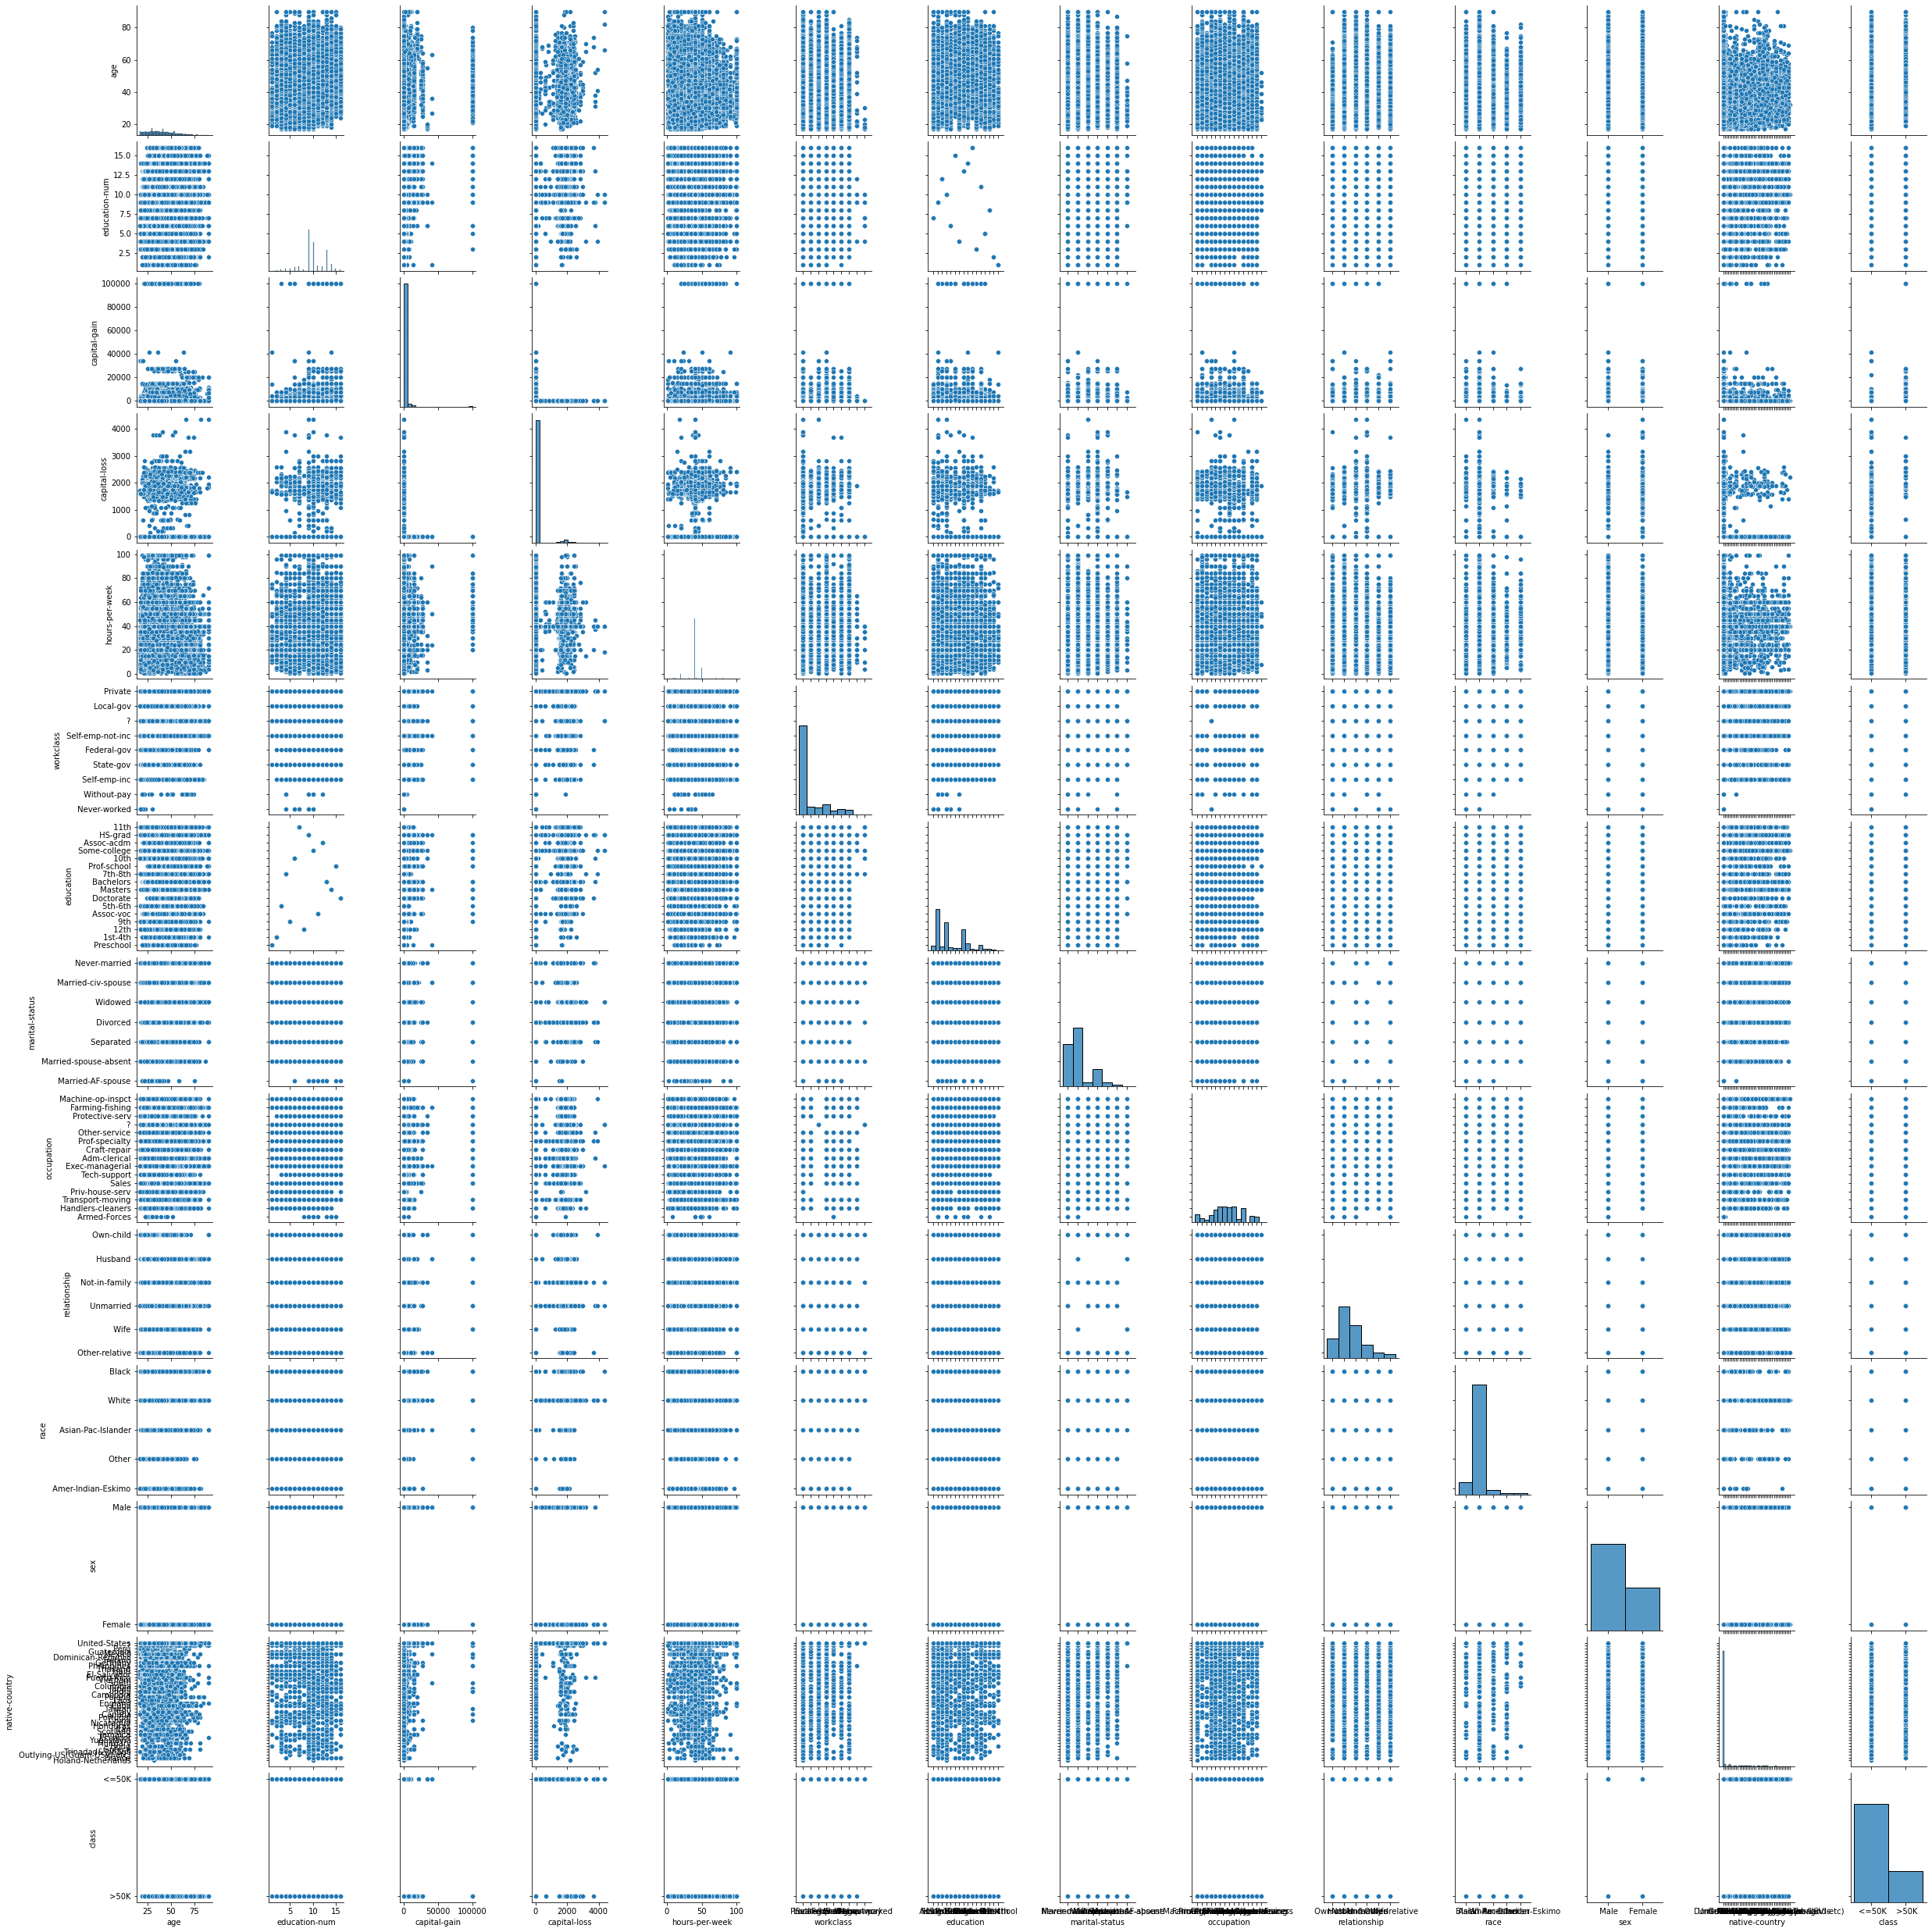

In [15]:
_ = sns.pairplot(myData, vars=myData)

In [20]:
# Education and education-num seem to be linked and they are :
pd.crosstab(index=myData["education"], columns=myData["education-num"])

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
1st-4th,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0
